***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [3]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
 print(
0, "até", 2*788,
2, "até", 5*788,
5, "até", 15*788,
15, "até", 25*788,
">", 25*788
)

0 até 1576 2 até 3940 5 até 11820 15 até 19700 > 19700


In [5]:
df.Renda.max()

200000

In [6]:
intervalo = [0, 1576, 3940, 11820, 19700, 200000]

In [59]:
classes = [
    df.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    df.Renda.max()

]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [7]:
classes = ["E", "D", "C", "B", "A"]

### 3º Construir a coluna de frequências

In [8]:
Pessoas_por_Renda = pd.value_counts(
pd.cut(x = df.Renda,
       bins = intervalo,
       labels = classes,
       include_lowest=True
       )
)
Pessoas_por_Renda 

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [9]:
Pessoas_por_Renda_percent = pd.value_counts(
pd.cut(x = df.Renda,
       bins = intervalo,
       labels = classes,
       include_lowest=True
       ), normalize = True 
)*100
Pessoas_por_Renda_percent

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [10]:
df_Renda = pd.DataFrame({"Pessoas" : Pessoas_por_Renda, 
                        "(%)" : round(Pessoas_por_Renda_percent,2)})
df_Renda = df_Renda.rename_axis(columns = "Classes")
df_Renda = df_Renda.sort_index(ascending=False)
df_Renda

Classes,Pessoas,(%)
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Pessoas'>

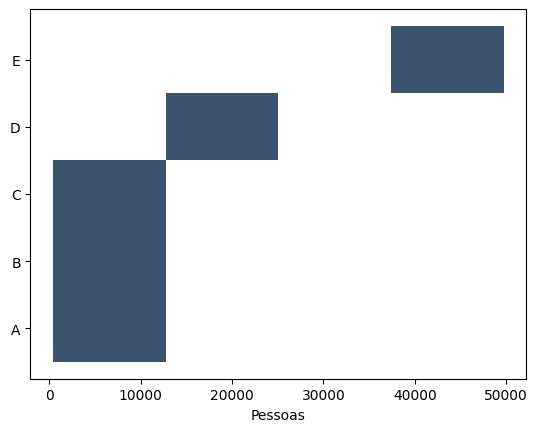

In [11]:
sns.histplot(df_Renda, x = df_Renda.Pessoas, y = df_Renda.index)

<Axes: title={'center': 'Pessoas por Classe Social (cor: Zima BLue)'}>

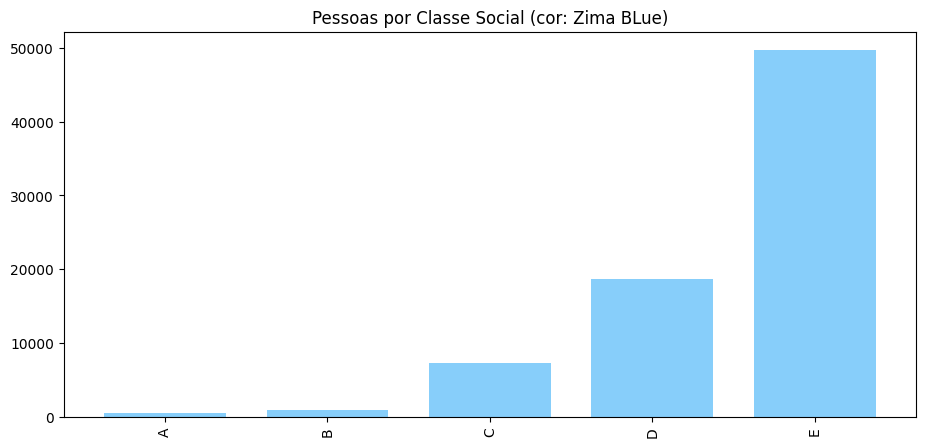

In [12]:
df_Renda.Pessoas.plot.bar(width = 0.75, 
                          color = "#87CEFA", 
                          figsize = (11,5), 
                          title = "Pessoas por Classe Social (cor: Zima BLue)")



> ### Conclusões

O resultado desta análise é impressionante, especialmente pela grande desigualdade econômico-social do nosso país, onde mais de 64% das pessoas consultadas estão enquadradas na classe E, possuindo uma renda mensal entre 0 e 2 salários mínimos. Enquanto apenas 0,5% da população pertece a classe , possuindo uma renda superior a 25 salários minimos'

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<ipython-input-13-7212a4c187b7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Altura)


<Axes: xlabel='Altura', ylabel='Density'>

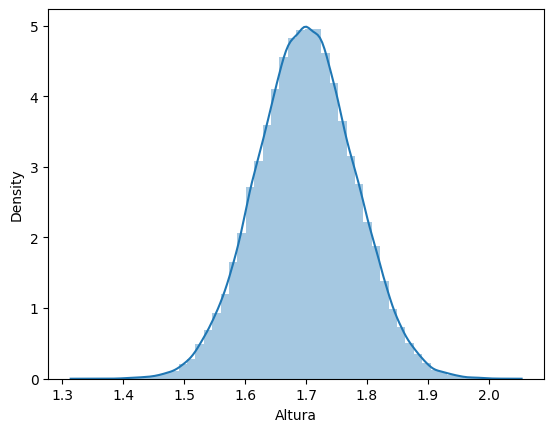

In [13]:
sns.distplot(df.Altura)

In [14]:
df.Altura.mean()

1.6995124540575741

In [15]:
df.Altura.median()

1.6993247325

In [16]:
df.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

<ipython-input-17-c3b95c2edc3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Idade)


<Axes: xlabel='Idade', ylabel='Density'>

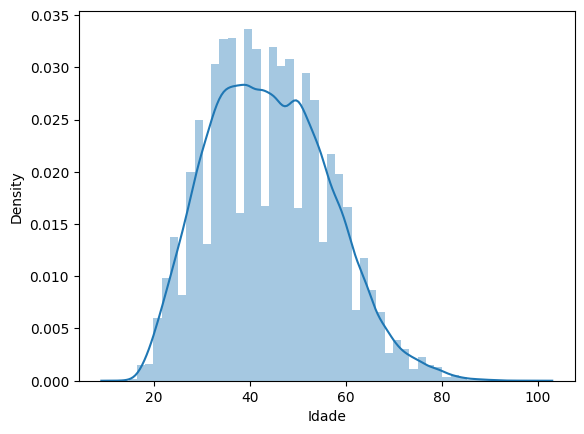

In [17]:
sns.distplot(df.Idade)

In [18]:
df.Idade.mean()

44.07142113482561

In [19]:
df.Idade.median()

43.0

In [20]:
df.Idade.mode()[0]

40

<ipython-input-21-4953f28427c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Anos de Estudo"])


<Axes: xlabel='Anos de Estudo', ylabel='Density'>

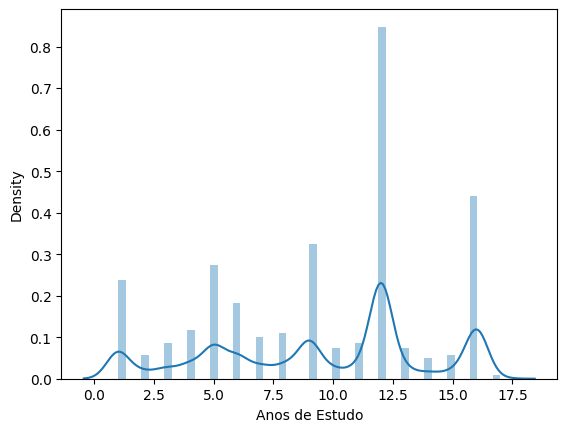

In [21]:
sns.distplot(df["Anos de Estudo"])

In [22]:
df["Anos de Estudo"].mean()

9.469664237376367

In [23]:
df["Anos de Estudo"].median()

11.0

> ### Conclusões

**Altura** apresenta uma simetria entre os sua média, mediana e moda, este métrica possui grande concentração nos dados intermediários, com casos extremos de pouca expressão e raros. 

---

**Idade** apresenta uma assimetria a direita, onde as pessoas que possuem uma idade bem avançada são mais relevantes, do que o outro extremo, porém as idades entre 30 e 50 anos continuam as mais representativas.

---

**Anos de Estudo** apresenta uma assimetria a esquerda, em que a quantidade de pessoas com pouquissimos anos de estudo é mais representativo do que as pessoas com mais anos de estudos, sendo que 11 anos de estudo é realmente um padrão firme entre a população, despontando muito a frente de qualquer outra medida.  

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-24-a570727e5e2e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.query('Renda > 20000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

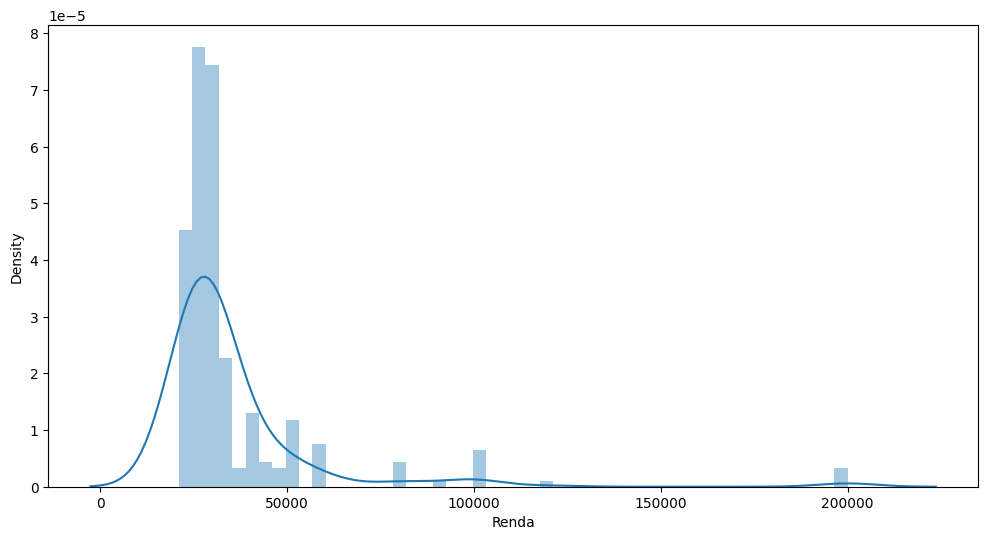

In [24]:
ax = sns.distplot(df.query('Renda > 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [25]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
estados = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [26]:
n = df.shape[0]
n

76840

In [27]:
# Regra de Struges para definir a quantida correta de divisões

1 + (10/3) * np.log10(n)

17.285291187298853

In [28]:
freq_renda = pd.value_counts(
    pd.cut(
       x = df.Renda,
       bins = 17,
       include_lowest = True
       ), sort = False
)
freq_renda

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [29]:
freq_percent = pd.value_counts(
    pd.cut(
       x = df.Renda,
       bins = 17,
       include_lowest = True
       ), 
       sort = False,
       normalize = True

) * 100
freq_percent

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renda, dtype: float64

In [30]:
tab_freq = pd.DataFrame ({"Renda" : freq_renda,
                          "%" : freq_percent
})
tab_freq

,Renda,%
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


In [61]:
tab_sex_cor = pd.crosstab(df.Sexo, df.Cor)
tab_sex_cor = tab_sex_cor.rename(index = sexo)
tab_sex_cor = tab_sex_cor.rename(columns = cor)

tab_sex_cor 

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [31]:
tab_sex_cor = pd.crosstab(df.Sexo, df.Cor, normalize = True) * 100
tab_sex_cor = tab_sex_cor.rename(index = sexo)
tab_sex_cor = tab_sex_cor.rename(columns = cor)

tab_sex_cor 

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Com relação à distribuição de renda, a proporção desigual se evidencia ao separarmos o montante total de dados em partes iguais uitilizando o método de Strurges, neste caso 17 categorias, a conclusão é que 98% das pessoas permanece na primeira categoria, enquanto o restante populacional é distruibuido em frações insignificantes nas demais categorias.

---

Já em relação a avaliação das raças e sexo, vemos uma proporção muito maior para pardos com 32,6% para homens e 14,1% para mulheres, seguido por brancos com 28,8% para homens e 12,5% para mulheres, enquanto a 3ª mais expressiva é a população preta com 7,6% para homens e 3,7% para mulheres, indígenas e amarelos representa expressiva minória.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [32]:
media = "{:,.2f}".format(df.Renda.mean())
print("R$:",media)

R$: 2,000.38


### Obtenha a mediana

In [33]:
mediana = "{:,.2f}".format(df.Renda.median())
print("R$:",mediana)

R$: 1,200.00


### Obtenha a moda

In [34]:
df.Renda.mode()[0]
moda = "{:,.2f}".format(df.Renda.mode()[0])
print("R$:",moda)

R$: 788.00


### Obtenha o desvio médio absoluto

In [35]:
desvio = (df.Renda - df.Renda.mean()).abs()
desvio.mean()

1526.4951371638058

In [36]:
df.Renda.mad()

<ipython-input-36-bbabe4df5639>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [37]:
variancia = (df.Renda - df.Renda.mean()) ** 2
variancia.mean()

11044762.267200803

In [38]:
desvio.pow(2).mean()

11044762.267200803

In [39]:
df.Renda.var()

11044906.006217021

In [40]:
(df.Renda.pow(2)).sum() / (len(df.Renda) - 1)

15046491.02532568

### Obtenha o desvio-padrão

In [41]:
np.sqrt(variancia.mean())

3323.366104900392

In [42]:
df.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [63]:
Renda_sex_cor = pd.crosstab(df.Cor,
         df.Sexo,
         aggfunc = {"mean", "median", "max"},
         values = df.Renda)
Renda_sex_cor.rename(columns = sexo, inplace = True)
Renda_sex_cor.rename(index = cor, inplace = True)
Renda_sex_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

In [43]:
Renda_sex_cor = pd.crosstab(df.Sexo,
         df.Cor,
         aggfunc = {"mean", "median", "max"},
         values = df.Renda)
Renda_sex_cor.rename(columns = cor, inplace = True)
Renda_sex_cor.rename(index = sexo, inplace = True)
Renda_sex_cor

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

> ### Conclusões

Um fato curioso, é em relação à renda dos indígenas, que que são a única raça que possui a média, a máxima e a mediana das mulheres superior a dos homens.Isso pode occorrer devido a um Outlier, das mulheres indíginas, pois a renda máima desse grupo é de 120,000.00, enquanto a dos homens não passa de 10,000.00. Em todos os demais grupos vemos de uma desparidade grande na relação as rendas de homens e mulhere

---

É interessante como a média de renda dos grupos, nos mostra algo não intuitívo, mas a maior renda média esta com a raça Amarelos 


### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [44]:
df.Renda.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

In [45]:
df.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [46]:
df["Raças"] = df["Cor"].map(cor)
df["M | F"] = df["Sexo"].map(sexo)
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Raças,M | F
0,11,0,23,8,12,800,1.603808,Parda,Masculino
1,11,1,23,2,12,1150,1.739790,Branca,Feminino
2,11,1,35,8,15,880,1.760444,Parda,Feminino
3,11,0,46,2,6,3500,1.783158,Branca,Masculino
4,11,1,47,8,9,150,1.690631,Parda,Feminino
...,...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,Branca,Feminino
76836,53,0,30,4,7,1500,1.792934,Preta,Masculino
76837,53,0,32,8,12,1300,1.830587,Parda,Masculino
76838,53,0,57,8,4,1500,1.726344,Parda,Masculino


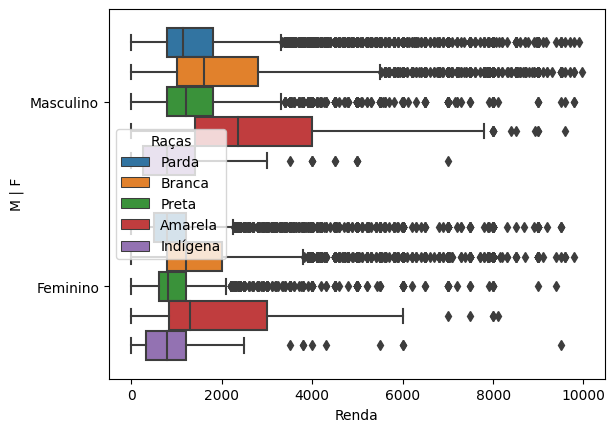

In [47]:
box = sns.boxplot(x = df.query("Renda < 10000").Renda, 
                  y= df["M | F"] ,
                  hue = df.Raças, 
                  orient = "h",
                  )


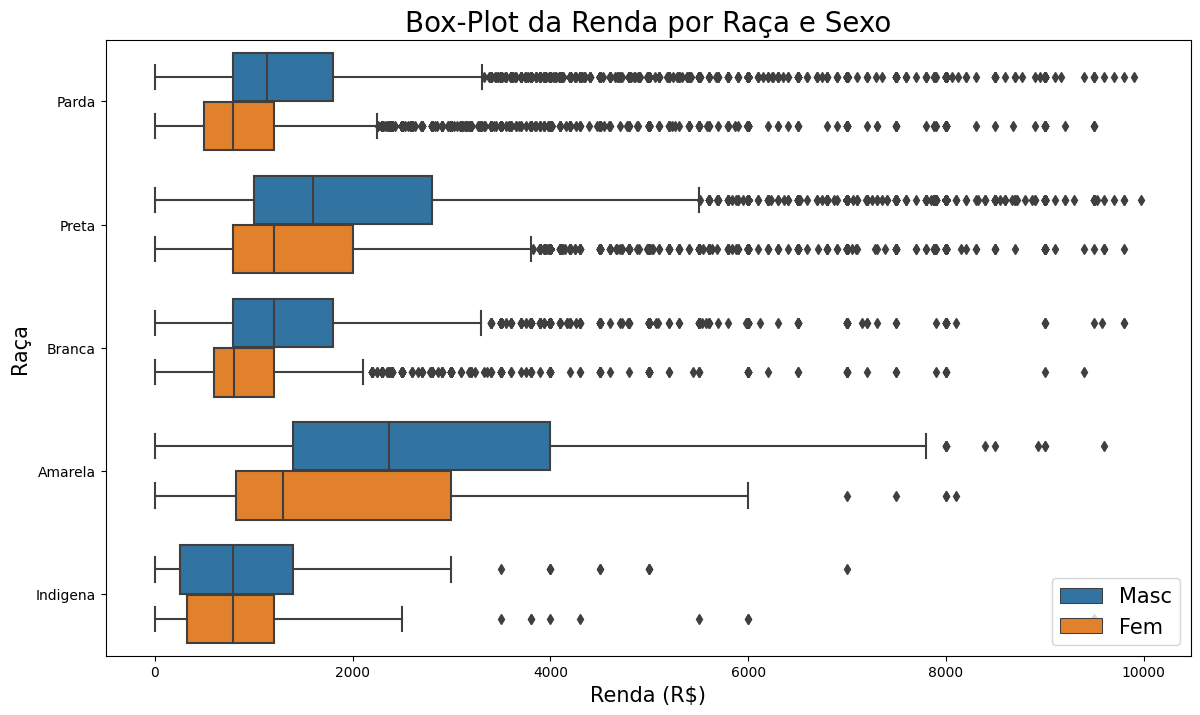

In [80]:
box = sns.boxplot(x = df.query("Renda < 10000").Renda, 
                  y = df.Raças,
                  hue = df["M | F"], 
                  orient = "h",
                  )

box.figure.set_size_inches(14, 8 )
box.set_title("Box-Plot da Renda por Raça e Sexo", fontsize=20)
box.set_xlabel("Renda (R$)", fontsize = 15)
box.set_ylabel("Raça", fontsize = 15)
box.set_yticklabels(['Parda','Preta','Branca','Amarela', 'Indigena'],fontsize = 10)

handles, _ = box.get_legend_handles_labels()
box.legend(handles, ['Masc', 'Fem'], fontsize = 15)

> ### Conclusões

É visível o melhor desenvolvimento economico do grupo racial Amarelo, seguidos pelos brancos que possuem o segundo melhor resultado, pardos e pretos, apresentam resultados muito semelhantes, enquanto os indígenas apresentam o pior indice econômico.
Em geral as mulheres apresentam resultados economicamente piores que os homens.

## <font color="red">DESAFIO<font>



### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [48]:
from scipy import stats

In [50]:
sm_ou_menos = print(round(stats.percentileofscore(df.Renda, 788.00, kind='weak'),2), "%")

28.87 %


In [89]:
sm_ou_menos = stats.percentileofscore(df.Renda, 788.00, kind='weak')
print("{:,.2f}%".format(sm_ou_menos))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [94]:
print("R$: {:,.2f}".format(df.Renda.quantile(.99)))

R$: 15,000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [97]:
renda_estatistica_por_sexo_e_estudo = pd.crosstab(df["Anos de Estudo"], 
                df.Sexo,
                aggfunc = {"mean", "median", "max", "std"},
                values = df.Renda)
renda_estatistica_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace=True)
renda_estatistica_por_sexo_e_estudo.rename(columns = sexo, inplace=True)
renda_estatistica_por_sexo_e_estudo

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano     30000    10000   799.494638   516.201748   
1 ano                              30000     2000   895.629047   492.771987   
2 anos                             40000     4000   931.178986   529.911638   
3 anos                             80000     3500  1109.203862   546.853916   
4 anos                             50000    10000  1302.329283   704.279111   
5 anos                             35000     8000  1338.653218   781.389776   
6 anos                             25000     6000  1448.875419   833.732824   
7 anos                             40000     9000  1465.497940   830.751004   
8 anos                             30000    18000  1639.396667   933.615351   
9 anos                             60000    20000  1508.038850   868.021700   
10 anos                            45000     6000  1731.270847   925.919225   
11 anos                           200000   100000  2117.060504  1286.790889   
12 anos                            30000   120000  2470.330776  1682.313725   
13 anos                            25000    20000  3195.099154  1911.730047   
14 anos                            50000    20000  3706.620269  2226.460457   
15 anos ou mais                   200000   100000  6134.279790  3899.513231   
Não determinados                    7000     3000  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

[Text(0, 0, 'Sem instrução e menos de 1 ano'),
 Text(0, 1, '1 ano'),
 Text(0, 2, '2 anos'),
 Text(0, 3, '3 anos'),
 Text(0, 4, '4 anos'),
 Text(0, 5, '5 anos'),
 Text(0, 6, '6 anos'),
 Text(0, 7, '7 anos'),
 Text(0, 8, '8 anos'),
 Text(0, 9, '9 anos'),
 Text(0, 10, '10 anos'),
 Text(0, 11, '11 anos'),
 Text(0, 12, '12 anos'),
 Text(0, 13, '13 anos'),
 Text(0, 14, '14 anos'),
 Text(0, 15, '15 anos ou mais'),
 Text(0, 16, 'Não determinados')]

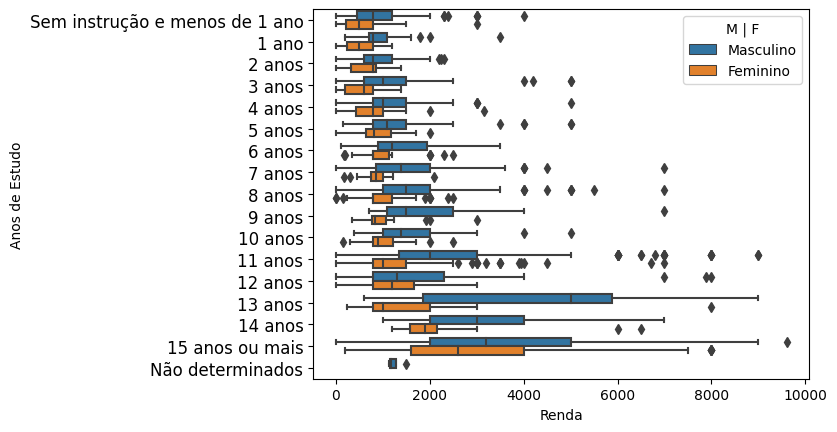

In [98]:
box2 = sns.boxplot(x = df.query("Renda < 10000 and Idade == 50 ").Renda, 
                  y= df["Anos de Estudo"] ,
                  hue = df["M | F"], 
                  orient = "h",
                  )
box2
box2.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12)

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

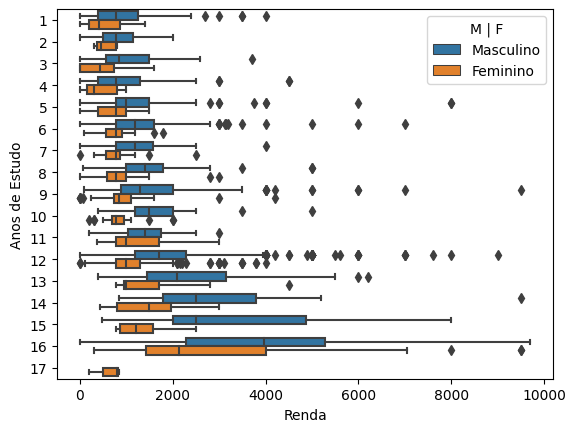

In [53]:
#@title
box2 = sns.boxplot(x = df.query("Renda < 10000 and Idade == 40 ").Renda, 
                  y= df["Anos de Estudo"] ,
                  hue = df["M | F"], 
                  orient = "h",
                  )
box2

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

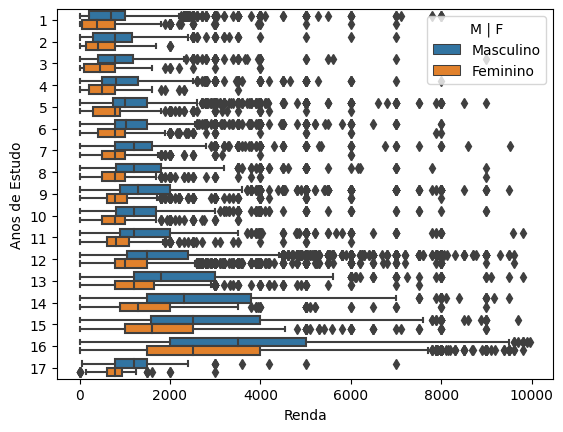

In [54]:
box2 = sns.boxplot(x = df.query("Renda < 10000").Renda, 
                  y= df["Anos de Estudo"] ,
                  hue = df["M | F"], 
                  orient = "h",
                  )
box2

> ### Conclusões

Em todos os casos analisados, os homems possuem a média de renda mensal maior que as mulheres.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [55]:
df["Estados"] = df["UF"].map(estados)
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Raças,M | F,Estados
0,11,0,23,8,12,800,1.603808,Parda,Masculino,Rondônia
1,11,1,23,2,12,1150,1.739790,Branca,Feminino,Rondônia
2,11,1,35,8,15,880,1.760444,Parda,Feminino,Rondônia
3,11,0,46,2,6,3500,1.783158,Branca,Masculino,Rondônia
4,11,1,47,8,9,150,1.690631,Parda,Feminino,Rondônia


In [56]:
df.groupby(['Estados']).agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                             
                            mean  median     max          std
Estados                                                      
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: xlabel='Renda', ylabel='Estados'>

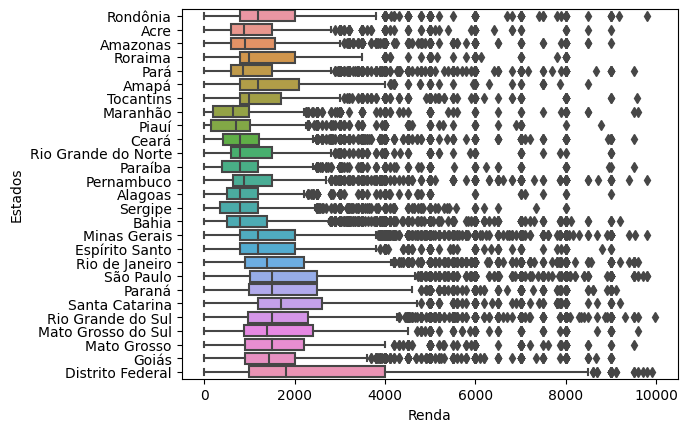

In [57]:
sns.boxplot(x = df.query("Renda < 10000").Renda, 
            y = df.Estados,
            orient = "h")

> ### Conclusões

Distrito Federal se destaca como estado com maior renda média, seguido por Santa Catarina, São Paulo e Rio de janiero, já entre os de menor média temos Maranhão, Piauí e Sergipe. 